#### 感知器实现
###### 参考：[GitHub hanbt learn_dl perceptron](https://github.com/hanbt/learn_dl/blob/master/perceptron.py)

In [6]:
class Perceptron(object):
    
    def __init__(self, input_num, activator):
        '''
        初始化感知器，设置输入参数的个数，以及激活函数。
        激活函数的类型为double -> double
        '''
        self.activator = activator
        # 权重向量初始化为0
        self.weights = [0.0 for _ in range(input_num)]
        # 偏置项初始化为0
        self.bias = 0.0


    def __str__(self):
        '''
        打印学习到的权重、偏置项
        '''
        return 'weights\t:%s\nbias\t:%f\n' % (self.weights, self.bias)


    def predict(self, input_vec):
        '''
        输入向量，输出感知器的计算结果
        '''
        # 把input_vec[x1,x2,x3...]和weights[w1,w2,w3,...]打包在一起
        # 变成[(x1,w1),(x2,w2),(x3,w3),...]
        # 然后利用map函数计算[x1*w1, x2*w2, x3*w3]
        # 最后利用reduce求和
        return self.activator(
            reduce(lambda a, b: a + b,
                   map(lambda (x, w): x * w,  
                       zip(input_vec, self.weights))
                , 0.0) + self.bias)


    def train(self, input_vecs, labels, iteration, rate):
        '''
        输入训练数据：一组向量、与每个向量对应的label；以及训练轮数、学习率
        '''
        for i in range(iteration):
            self._one_iteration(input_vecs, labels, rate)


    def _one_iteration(self, input_vecs, labels, rate):
        '''
        一次迭代，把所有的训练数据过一遍
        '''
        # 把输入和输出打包在一起，成为样本的列表[(input_vec, label), ...]
        # 而每个训练样本是(input_vec, label)
        samples = zip(input_vecs, labels)
        # 对每个样本，按照感知器规则更新权重
        for (input_vec, label) in samples:
            # 计算感知器在当前权重下的输出
            output = self.predict(input_vec)
            # 更新权重
            self._update_weights(input_vec, output, label, rate)


    def _update_weights(self, input_vec, output, label, rate):
        '''
        按照感知器规则更新权重
        '''
        # 把input_vec[x1,x2,x3,...]和weights[w1,w2,w3,...]打包在一起
        # 变成[(x1,w1),(x2,w2),(x3,w3),...]
        # 然后利用感知器规则更新权重
        delta = label - output
        self.weights = map(
            lambda (x, w): w + rate * delta * x,
            zip(input_vec, self.weights))
        # 更新bias
        self.bias += rate * delta


#### 使用感知器实现 And

In [2]:
def f(x):
    '''
    定义激活函数f
    '''
    return 1 if x > 0 else 0


def get_training_dataset():
    '''
    基于and真值表构建训练数据
    '''
    # 构建训练数据
    # 输入向量列表
    input_vecs = [[1,1], [0,0], [1,0], [0,1]]
    # 期望的输出列表，注意要与输入一一对应
    # [1,1] -> 1, [0,0] -> 0, [1,0] -> 0, [0,1] -> 0
    labels = [1, 0, 0, 0]
    return input_vecs, labels


def train_and_perceptron():
    '''
    使用and真值表训练感知器
    '''
    # 创建感知器，输入参数个数为2（因为and是二元函数），激活函数为f
    p = Perceptron(2, f)
    # 训练，迭代10轮, 学习速率为0.1
    input_vecs, labels = get_training_dataset()
    p.train(input_vecs, labels, 10, 0.1)
    #返回训练好的感知器
    return p


if __name__ == '__main__': 
    # 训练and感知器
    and_perception = train_and_perceptron()
    # 打印训练获得的权重
    print and_perception
    # 测试
    print '1 and 1 = %d' % and_perception.predict([1, 1])
    print '0 and 0 = %d' % and_perception.predict([0, 0])
    print '1 and 0 = %d' % and_perception.predict([1, 0])
    print '0 and 1 = %d' % and_perception.predict([0, 1])


weights	:[0.1, 0.2]
bias	:-0.200000

1 and 1 = 1
0 and 0 = 0
1 and 0 = 0
0 and 1 = 0


#### 使用感知器实现线性回归
###### 参考：[GitHub hanbt learn_dl linear_unit](https://github.com/hanbt/learn_dl/blob/master/linear_unit.py)

weights	:[1124.0634970262222]
bias	:85.485289

Work 3.4 years, monthly salary = 3907.30
Work 15 years, monthly salary = 16946.44
Work 1.5 years, monthly salary = 1771.58
Work 6.3 years, monthly salary = 7167.09


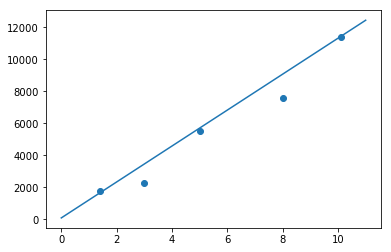

In [7]:
#定义激活函数f
f = lambda x: x

class LinearUnit(Perceptron):
    def __init__(self, input_num):
        '''初始化线性单元，设置输入参数的个数'''
        Perceptron.__init__(self, input_num, f)


def get_training_dataset():
    '''
    捏造5个人的收入数据
    '''
    # 构建训练数据
    # 输入向量列表，每一项是工作年限
    input_vecs = [[5], [3], [8], [1.4], [10.1]]
    # 期望的输出列表，月薪，注意要与输入一一对应
    labels = [5500, 2300, 7600, 1800, 11400]
    return input_vecs, labels    


def train_linear_unit():
    '''
    使用数据训练线性单元
    '''
    # 创建感知器，输入参数的特征数为1（工作年限）
    lu = LinearUnit(1)
    # 训练，迭代10轮, 学习速率为0.01
    input_vecs, labels = get_training_dataset()
    lu.train(input_vecs, labels, 10, 0.01)
    #返回训练好的线性单元
    return lu


def plot(linear_unit):
    import matplotlib.pyplot as plt
    input_vecs, labels = get_training_dataset()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(map(lambda x: x[0], input_vecs), labels)
    weights = linear_unit.weights
    bias = linear_unit.bias
    x = range(0,12,1)
    y = map(lambda x:weights[0] * x + bias, x)
    ax.plot(x, y)
    plt.show()


if __name__ == '__main__': 
    '''训练线性单元'''
    linear_unit = train_linear_unit()
    # 打印训练获得的权重
    print linear_unit
    # 测试
    print 'Work 3.4 years, monthly salary = %.2f' % linear_unit.predict([3.4])
    print 'Work 15 years, monthly salary = %.2f' % linear_unit.predict([15])
    print 'Work 1.5 years, monthly salary = %.2f' % linear_unit.predict([1.5])
    print 'Work 6.3 years, monthly salary = %.2f' % linear_unit.predict([6.3])
    plot(linear_unit)